In [1]:
import sys
!{sys.executable} --version
!{sys.executable} -m pip --version
!{sys.executable} -m pip install scikit-learn pyarrow matplotlib seaborn

import seaborn as sns
import filters as fl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import polars as pl

Python 3.13.1
pip 25.0.1 from /home/andre-fontenele/gh/monkeytype-analysis/env/lib/python3.13/site-packages/pip (python 3.13)
  Using cached pyarrow-19.0.0-cp313-cp313-manylinux_2_28_x86_64.whl.metadata (3.3 kB)
Using cached pyarrow-19.0.0-cp313-cp313-manylinux_2_28_x86_64.whl (42.1 MB)


['_id', 'isPb', 'wpm', 'acc', 'rawWpm', 'consistency', 'charStats', 'mode', 'mode2', 'quoteLength', 'restartCount', 'testDuration', 'afkDuration', 'incompleteTestSeconds', 'punctuation', 'numbers', 'language', 'funbox', 'difficulty', 'lazyMode', 'blindMode', 'bailedOut', 'tags', 'timestamp', 'timeIndex', 'testType', 'dataGroup', 'correct', 'incorrect', 'extra', 'missed']


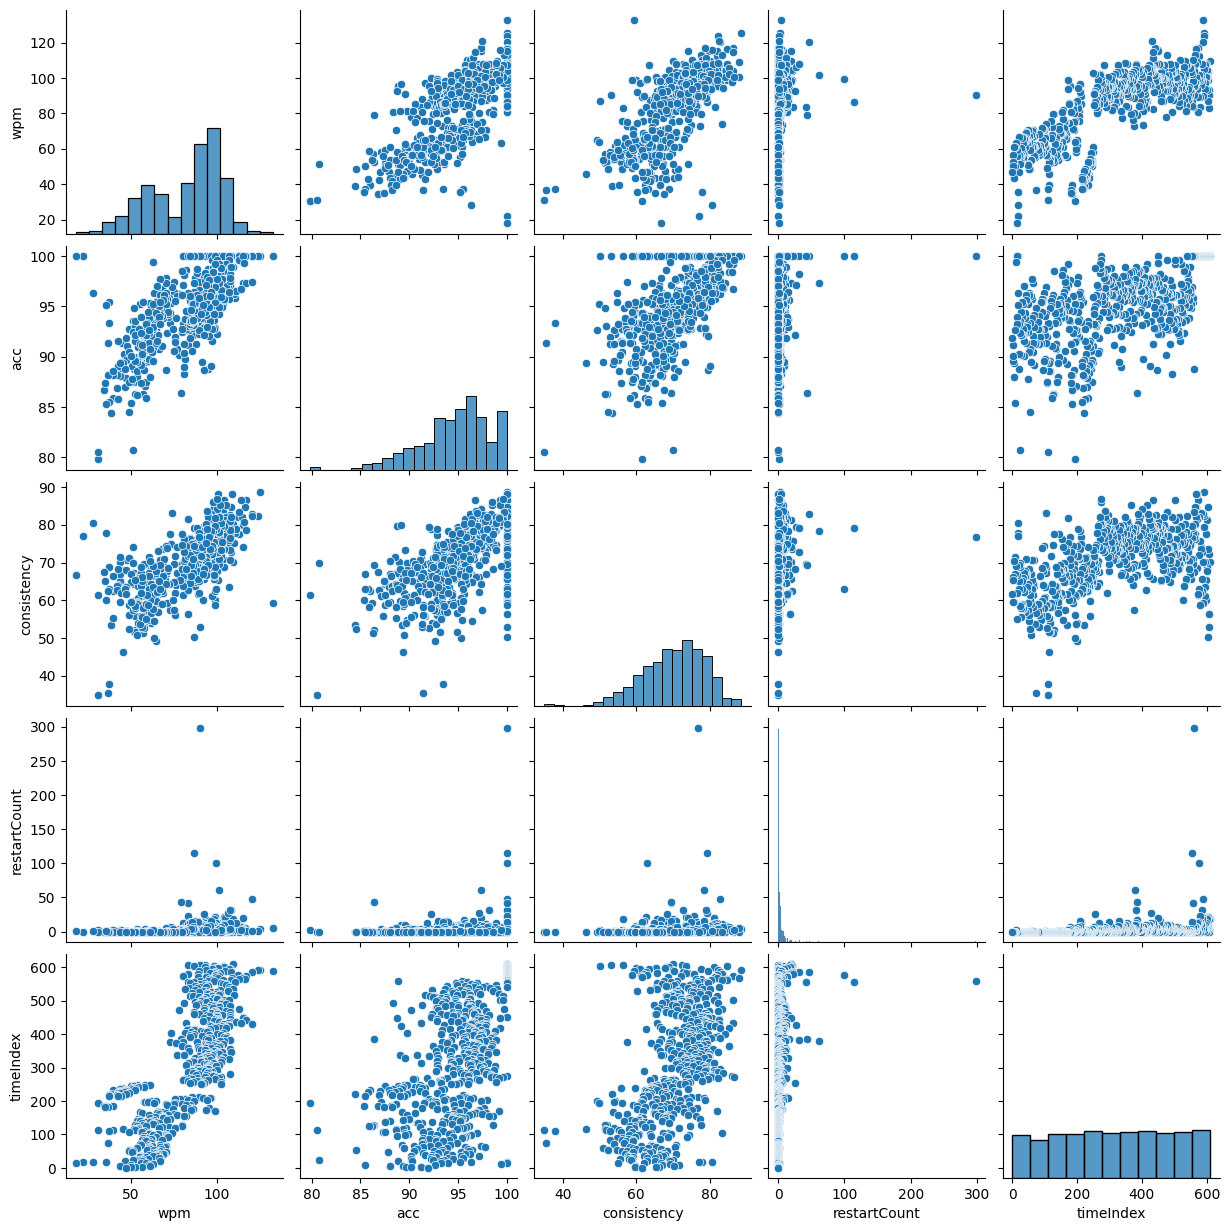

In [2]:
dta = fl.import_filt('new','old','qwert_col','colemak')
x = dta.to_pandas()
xarst = dta.to_pandas()[['wpm','acc','consistency','testType','restartCount','timeIndex']]
sns.pairplot(xarst)

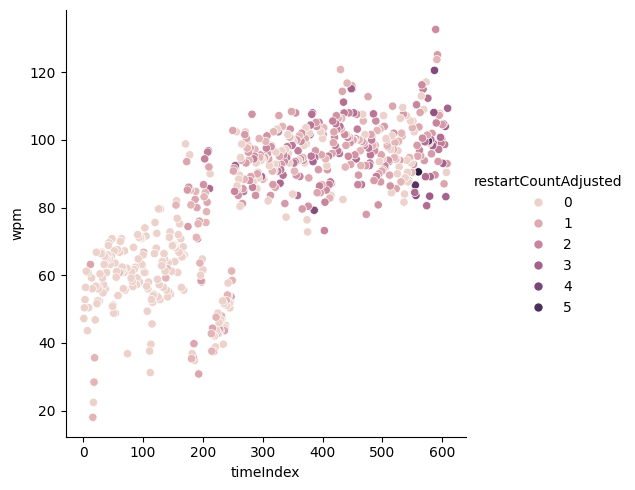

In [3]:
xqwfp = fl.graph_ops(dta).to_pandas()[['wpm','acc','consistency','testType','restartCountAdjusted','timeIndex','dataGroup']]
sns.relplot(xqwfp,y='wpm',x='timeIndex',hue='restartCountAdjusted')

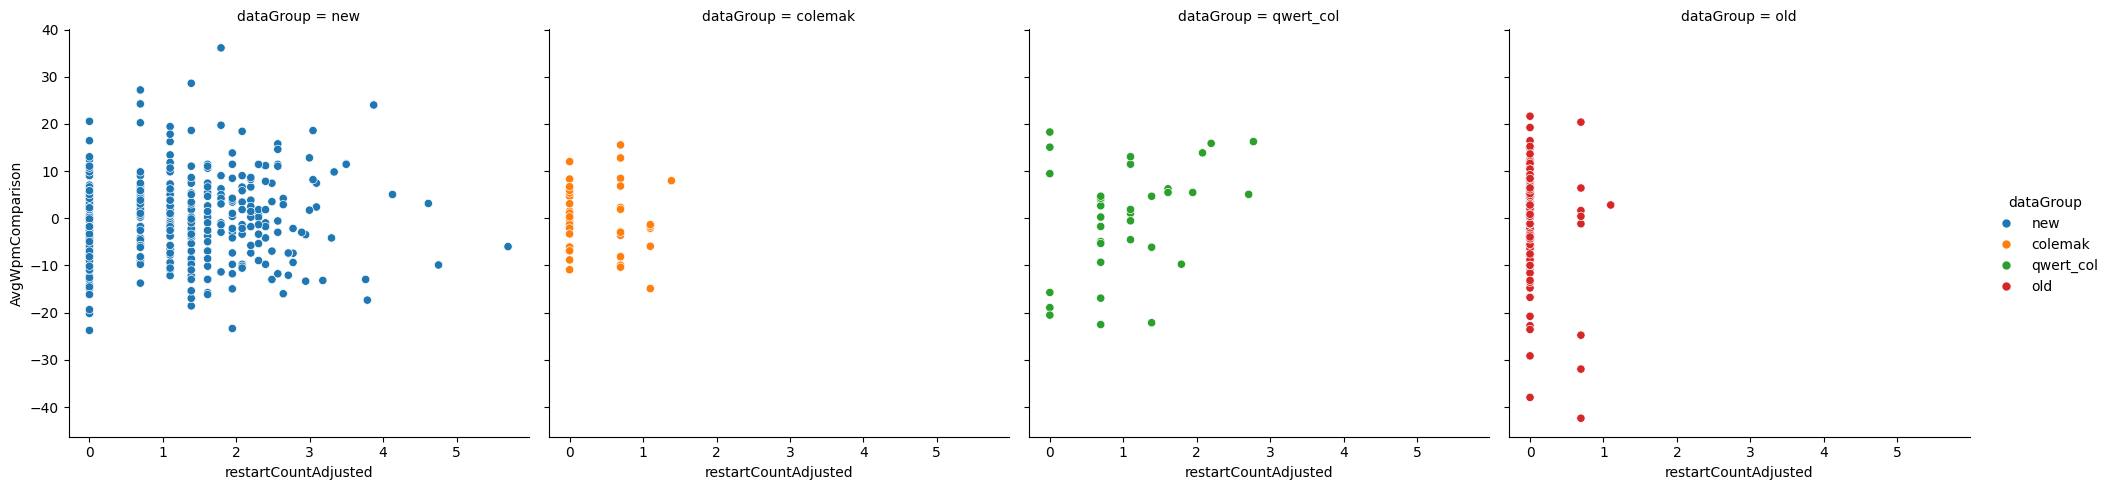

In [4]:
arst = fl.graph_ops(dta).to_pandas()
sns.relplot(arst,y='AvgWpmComparison',x='restartCountAdjusted',hue='dataGroup',col='dataGroup')

<Axes: xlabel='extra', ylabel='missed'>

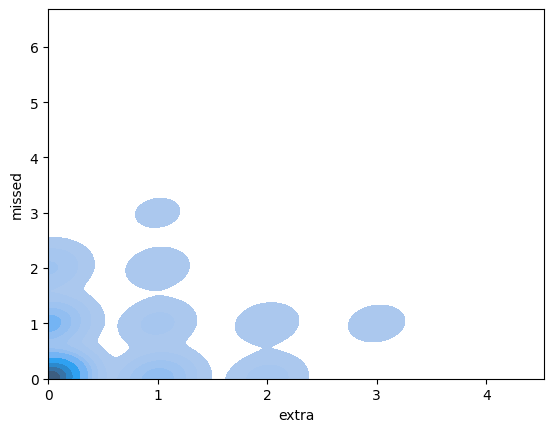

In [5]:
sns.kdeplot(data=x,x='extra',y='missed',clip=[[0,50],[0,50]],fill=True)

<Axes: xlabel='incorrect', ylabel='missed'>

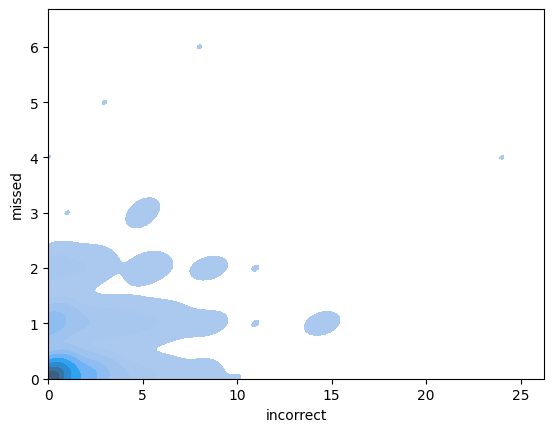

In [6]:
sns.kdeplot(data=x,x='incorrect',y='missed',clip=[[0,70],[0,70]],fill=True)

<Axes: xlabel='incorrect', ylabel='extra'>

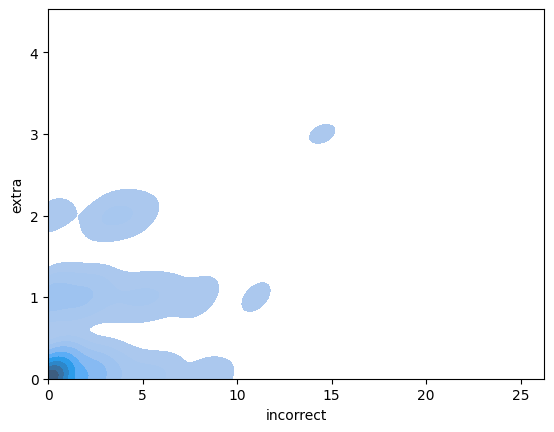

In [7]:
sns.kdeplot(data=x,x='incorrect',y='extra',clip=[[0,50],[0,50]],fill=True)

In [8]:
dta2 = fl.import_filt('colemak','qwert_col')
x2 = dta2.to_pandas()[['wpm','acc','consistency','timestamp','testDuration','incorrect','missed','extra','testType','dataGroup']]

['_id', 'isPb', 'wpm', 'acc', 'rawWpm', 'consistency', 'charStats', 'mode', 'mode2', 'quoteLength', 'restartCount', 'testDuration', 'afkDuration', 'incompleteTestSeconds', 'punctuation', 'numbers', 'language', 'funbox', 'difficulty', 'lazyMode', 'blindMode', 'bailedOut', 'tags', 'timestamp', 'timeIndex', 'testType', 'dataGroup', 'correct', 'incorrect', 'extra', 'missed']


In [ ]:
sns.pairplot(x2,hue='dataGroup')

In [ ]:
sns.relplot(x2,x='acc',y='wpm',hue='dataGroup')

In [ ]:
colemakAccWpm = LinearRegression().fit(X=x2[['acc']],y=x2[['wpm']])
qwertyAccWpm = LinearRegression().fit(X=x[['acc']],y=x[['wpm']])

In [ ]:
print(colemakAccWpm.score(X=x2[['acc']],y=x2[['wpm']]))
print(qwertyAccWpm.score(X=x[['acc']],y=x[['wpm']]))

In [ ]:
print(f"colemak line: \n\tslope: {colemakAccWpm.coef_[0][0]}\n\tintercept: {colemakAccWpm.intercept_[0]}")
print(f"qwerty line: \n\tslope: {qwertyAccWpm.coef_[0][0]}\n\tintercept: {qwertyAccWpm.intercept_[0]}")

In [ ]:
dta3 = fl.import_filt('new','old','colemak','qwert_col')
z = dta3.to_pandas()
sns.relplot(z,x='timestamp',y='wpm')

In [ ]:
sns.relplot(z,x='acc',y='wpm',col='dataGroup',hue='dataGroup')

In [ ]:
sns.relplot(z,x='acc',y='wpm',size='wpm',sizes=(20,20),hue='dataGroup')

In [ ]:
sns.relplot(data=z,x='timeIndex',y='wpm')